<a href="https://colab.research.google.com/github/Shubham-M-Rathod/ADV/blob/main/Shubham_Rathod_2021600056.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exp 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Expt-2-world-data-2023.csv')

In [ ]:
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [ ]:
df.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

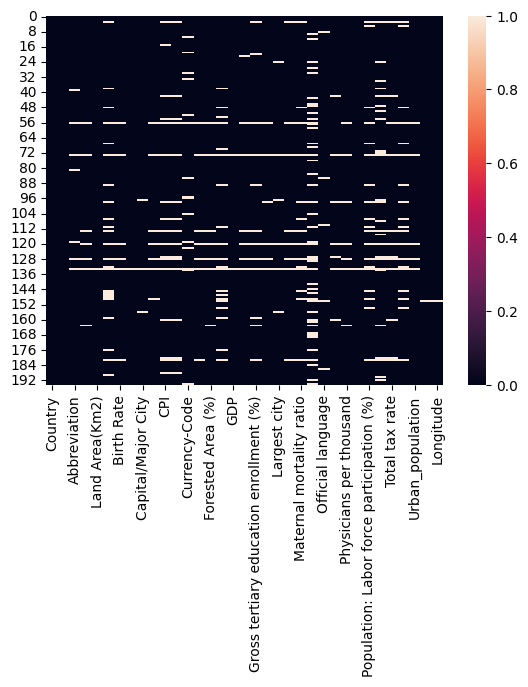

In [ ]:
import seaborn as sns
sns.heatmap(df.isna())
plt.show()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['GDP'] = df['GDP'].apply(lambda x: str(x).replace('$', '').replace(',', '') if isinstance(x, str) else x).astype(float)

In [ ]:
df['Agricultural Land( %)'] = df['Agricultural Land( %)'].str.replace('%', '').astype(float)

In [ ]:
df.Population = df.Population.apply(lambda x: int(x.replace(',', ''))).astype(float)

In [ ]:
df['Gross primary education enrollment (%)'] = df['Gross primary education enrollment (%)'].str.replace('%', '').astype(float)
df['Gross tertiary education enrollment (%)'] = df['Gross tertiary education enrollment (%)'].str.replace('%', '').astype(float)

In [ ]:
df['Population: Labor force participation (%)'] = df['Population: Labor force participation (%)'].str.replace('%', '').astype(float)

#### Line chart

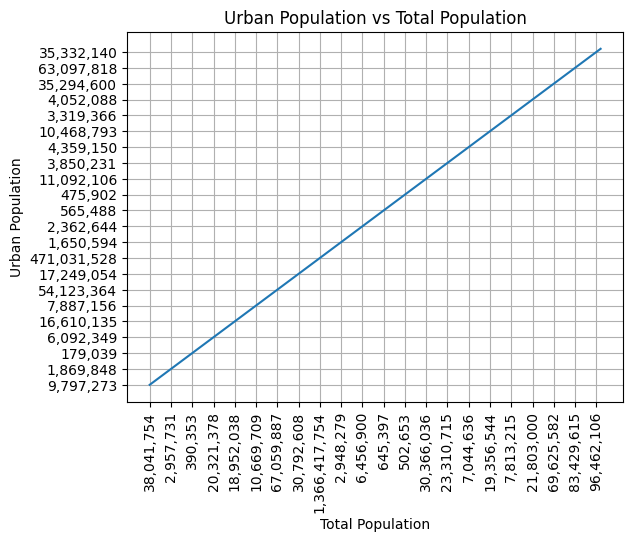

In [ ]:
import numpy as np
x_ticks = np.arange(0, len(df['Population']), step=5)
plt.xticks(ticks=x_ticks, labels=df['Population'].iloc[x_ticks], rotation=90)
y_ticks = np.arange(0, len(df['Urban_population']), step=5)
plt.yticks(ticks=y_ticks, labels=df['Urban_population'].iloc[y_ticks])

plt.plot(df['Population'], df['Urban_population'])
plt.title('Urban Population vs Total Population')
plt.xlabel('Total Population')
plt.ylabel('Urban Population')
plt.grid(True)
plt.show()

#### Area Chart

In [ ]:
import plotly.express as px
fig = px.area(
    df,
    x='Physicians per thousand',
    y='Life expectancy',
    title='Life Expectancy vs Physicians per Thousand',
    labels={'Physicians per thousand': 'Physicians per Thousand', 'Life expectancy': 'Life Expectancy'},
    template='plotly_white'
)

fig.show()

#### TreeMap

In [ ]:
import plotly.express as px
fig = px.treemap(df, path=['Country'], values='GDP',
                 title='GDP by Country')
fig.show()

#### Waterfall chart

In [ ]:
fig = go.Figure(go.Waterfall(
    name="Tax Revenue",
    x=df['Country'],
    y=df['Tax revenue (%)'],
    text=df['Tax revenue (%)'],
))

fig.show()

#### Funnel chart

In [ ]:
import plotly.express as px

fig_education = px.funnel(
    df,
    x=[
        df['Gross primary education enrollment (%)'].mean(),
        df['Gross tertiary education enrollment (%)'].mean()
    ],
    y=[
        'Gross Primary Education Enrollment (%)',
        'Gross Tertiary Education Enrollment (%)'
    ],
    title='Funnel Chart: Education Enrollment'
)

fig_education.show()

#### Donut chart

In [ ]:
import plotly.graph_objects as go
top_n = df.nlargest(10, 'Population: Labor force participation (%)')

fig = go.Figure(go.Pie(
    labels=top_n['Country'],
    values=top_n['Population: Labor force participation (%)'],
    hole=0.4
))

fig.update_layout(title="Donut Chart: Top 10 Labor Force Participation by Country")
fig.show()